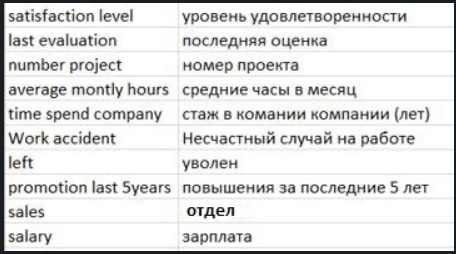

In [1]:
from IPython.display import Image
Image('data.jpg', width=600)

In [2]:
import io
import requests
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns
import researchpy as rp

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
from pylab import *

Загрузить файл hr.csv (можно найти во сложении к заданию)

In [3]:
import pandas as pd
data_hr = pd.read_csv('hr.csv ')
data_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [4]:
data_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
data_hr.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [6]:
data_hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
data_hr.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Рассчитать и визуализировать корреляционную матрицу для переменных

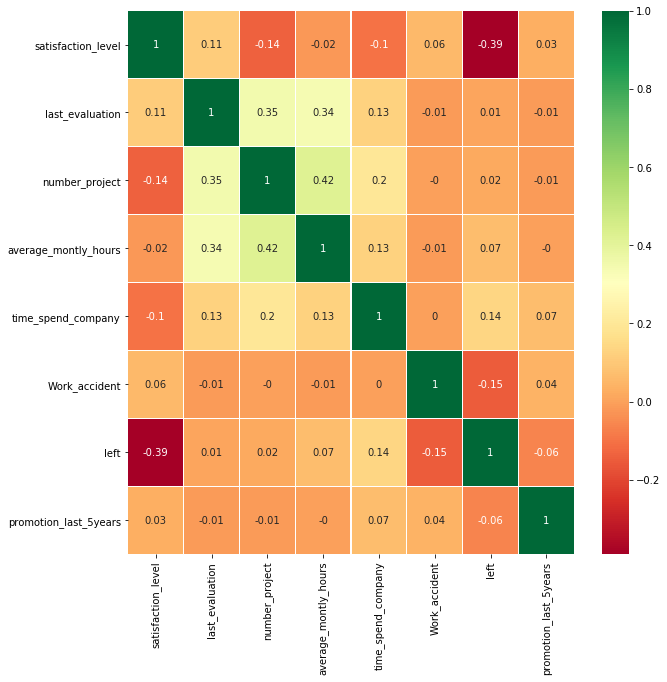

In [9]:
sns.heatmap(data_hr.corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

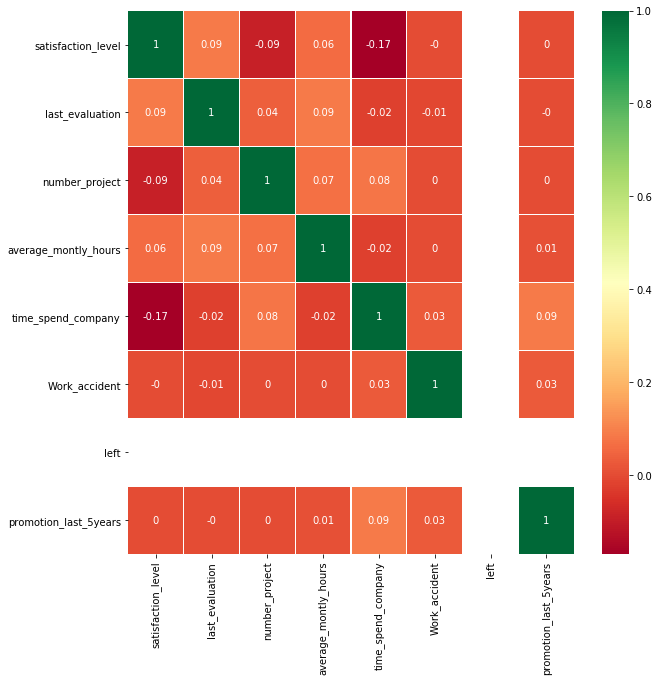

In [10]:
sns.heatmap(data_hr[data_hr['left']==0].corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

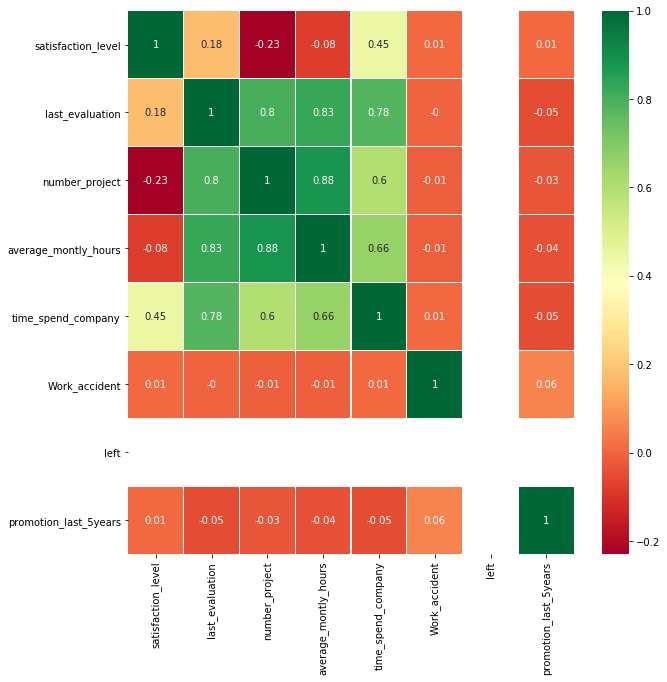

In [11]:
sns.heatmap(data_hr[data_hr['left']==1].corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

Визуализировать несколько взаимосвязей между переменными

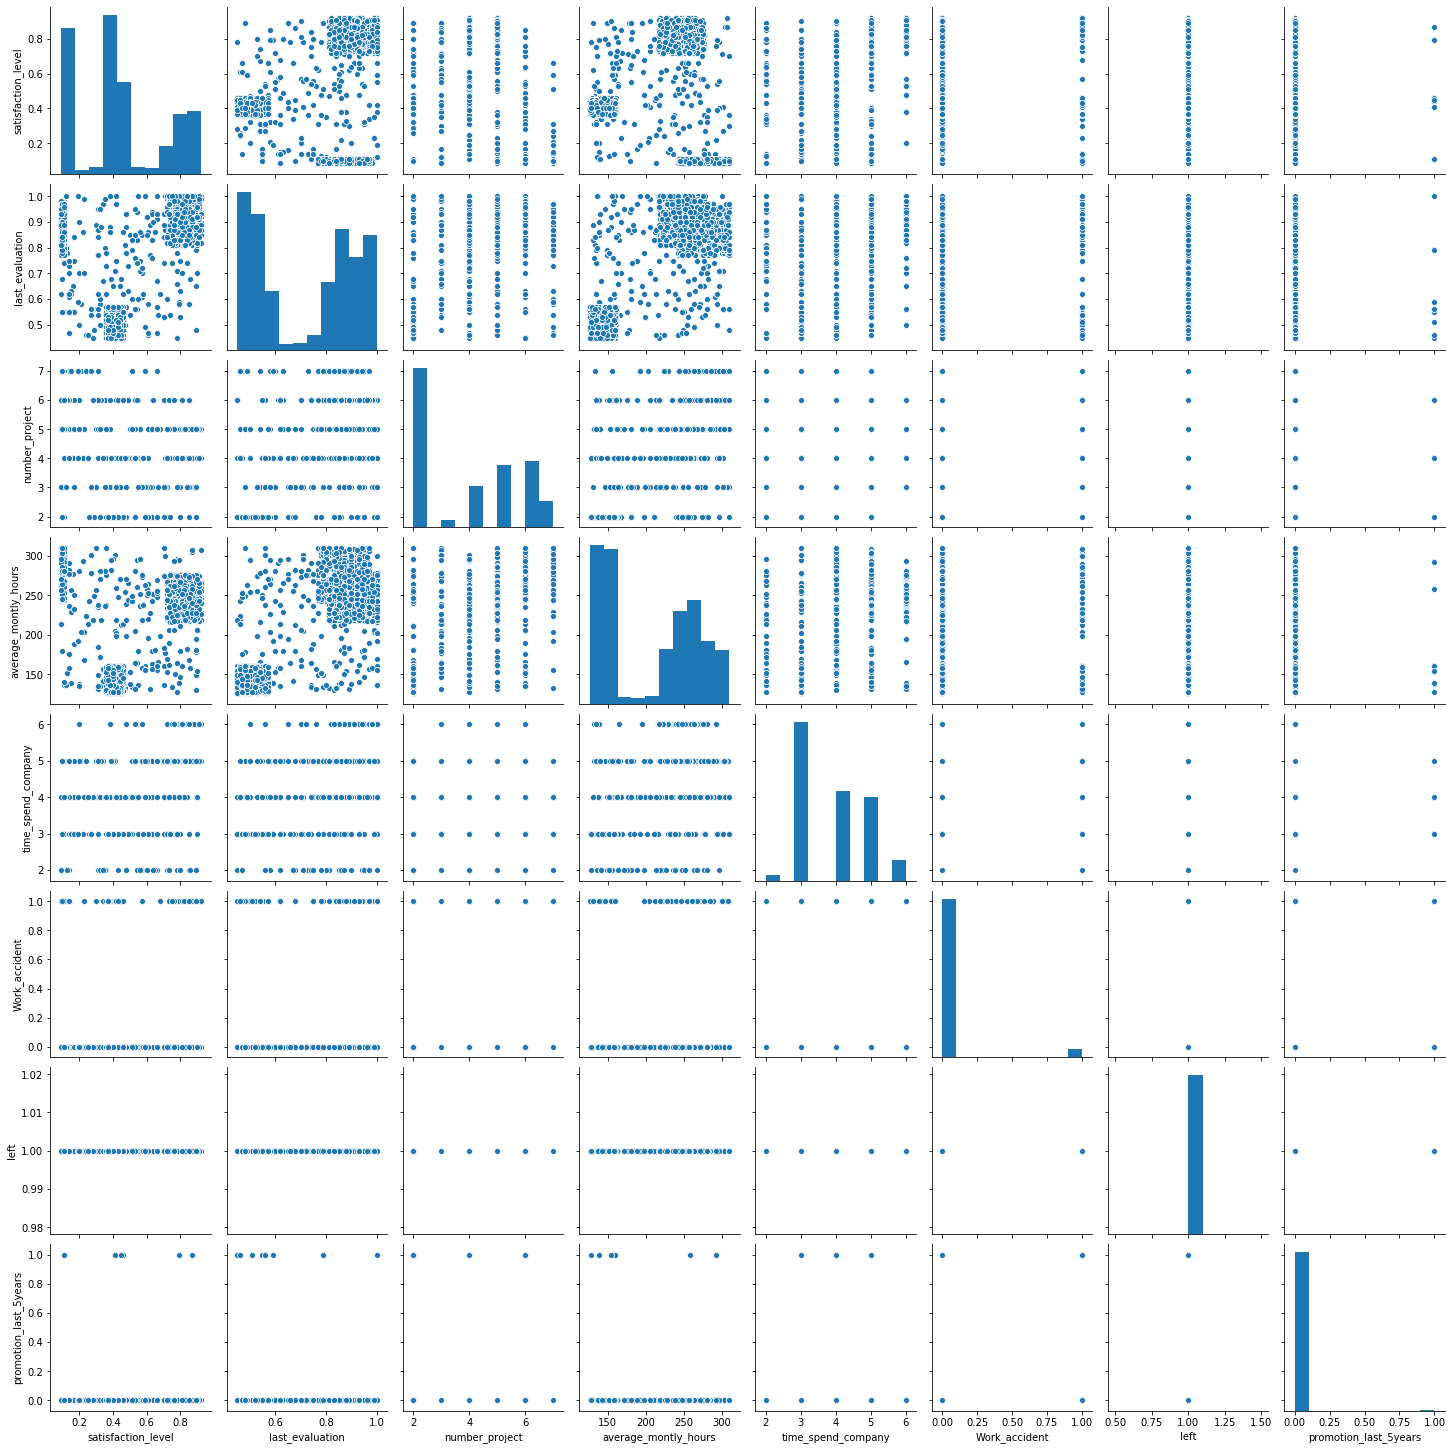

In [12]:
g = sns.pairplot(data_hr[data_hr['left']==1])

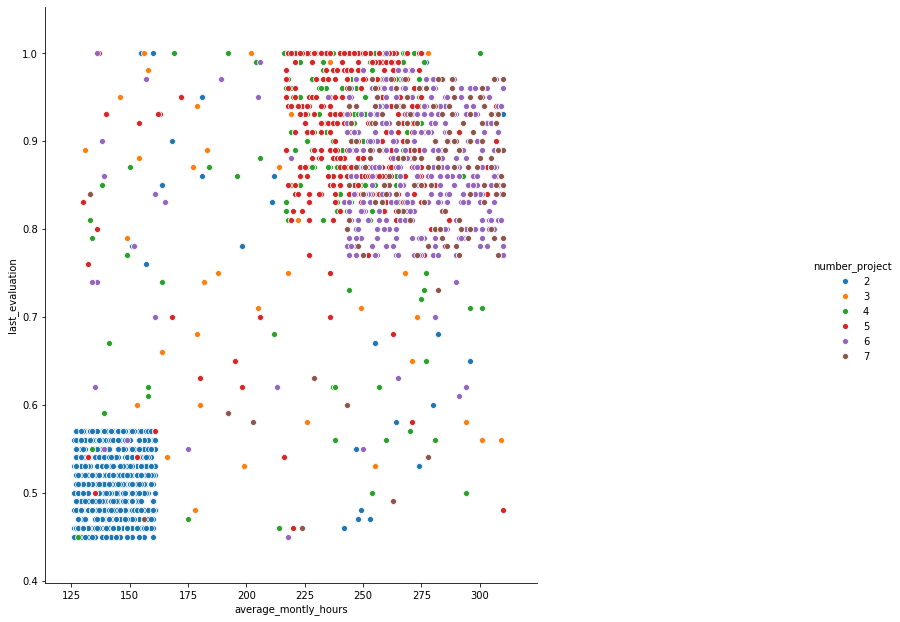

In [13]:
g = sns.pairplot(data_hr[data_hr['left']==1],
                 x_vars=["average_montly_hours"],
                 y_vars=["last_evaluation"],
                hue="number_project")
g.fig.set_size_inches(15,10)

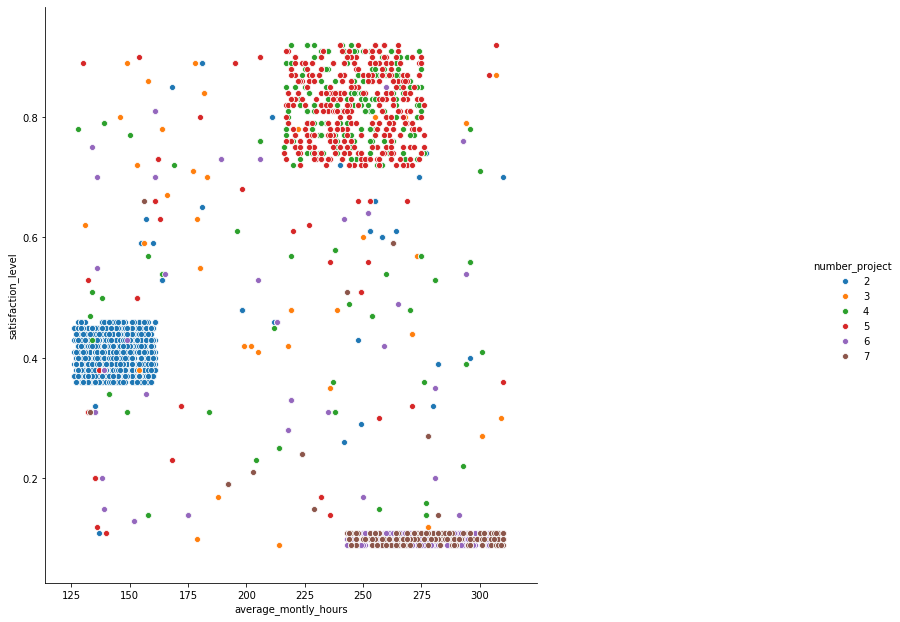

In [14]:
g = sns.pairplot(data_hr[data_hr['left']==1],
                 x_vars=["average_montly_hours"],
                 y_vars=["satisfaction_level"],
                hue="number_project")
g.fig.set_size_inches(15,10)

С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [15]:
descriptives, results = rp.ttest(data_hr[(data_hr['left']==1)].average_montly_hours, data_hr[(data_hr['left']==1)].last_evaluation)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,average_montly_hours,3571.0,207.419210,61.202825,1.024181,205.411172,209.427248
1,last_evaluation,3571.0,0.718113,0.197673,0.003308,0.711627,0.724598
2,combined,7142.0,104.068661,112.051247,1.325888,101.469529,106.667794


In [16]:
results

,Independent t-test,results
0,Difference (average_montly_hours - last_evalua...,206.7011
1,Degrees of freedom =,7140.0000
2,t =,201.8199
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,4.7762
7,Hedge's g =,4.7757
8,Glass's delta =,3.3773
9,r =,0.9224


In [17]:
descriptives, results = rp.ttest(data_hr[(data_hr['left']==1)].average_montly_hours, data_hr[(data_hr['left']==1)].number_project)

descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,average_montly_hours,3571.0,207.419210,61.202825,1.024181,205.411172,209.427248
1,number_project,3571.0,3.855503,1.818165,0.030426,3.795849,3.915156
2,combined,7142.0,105.637356,110.613199,1.308872,103.071580,108.203132


In [18]:
results

,Independent t-test,results
0,Difference (average_montly_hours - number_proj...,203.5637
1,Degrees of freedom =,7140.0000
2,t =,198.6700
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,4.7017
7,Hedge's g =,4.7012
8,Glass's delta =,3.3261
9,r =,0.9202


Рассчитать сколько работников работает в каждом департаменте

In [19]:
#убрать уволенных
print(len(data_hr[data_hr['left']==0]['sales']))
print(data_hr[data_hr['left']==0]['sales'].value_counts())

11428
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64


Показать распределение сотрудников по зарплатам

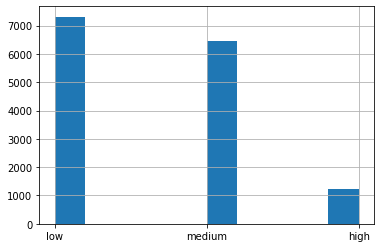

In [20]:
data_hr['salary'].hist()

Показать распределение сотрудников по зарплатам совместно с департаментами

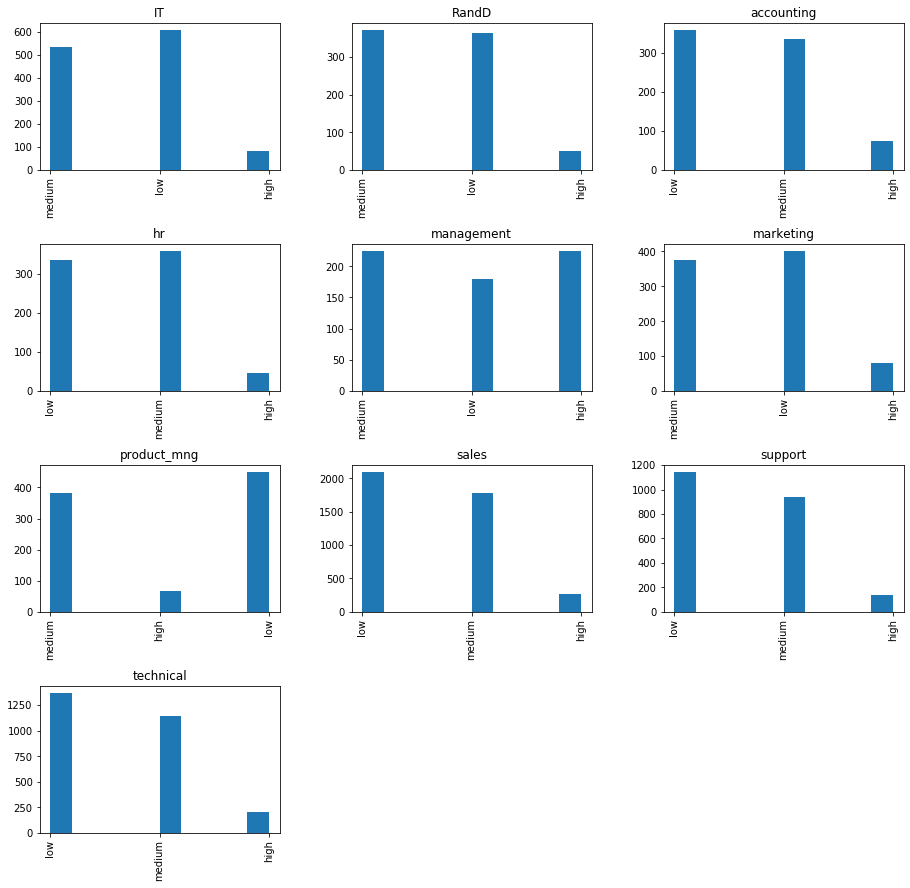

In [21]:
data_hr.hist(column='salary', by='sales',figsize=(15,15))
plt.show()

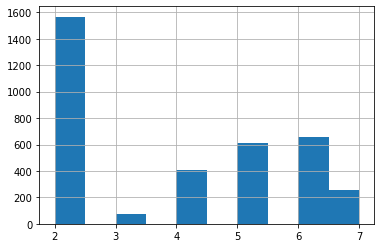

In [22]:
data_hr[data_hr['left']==1]['number_project'].hist()
plt.show()

Сколько сотрудников покинули компанию

In [23]:
len(data_hr[data_hr['left']==1])

3571

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

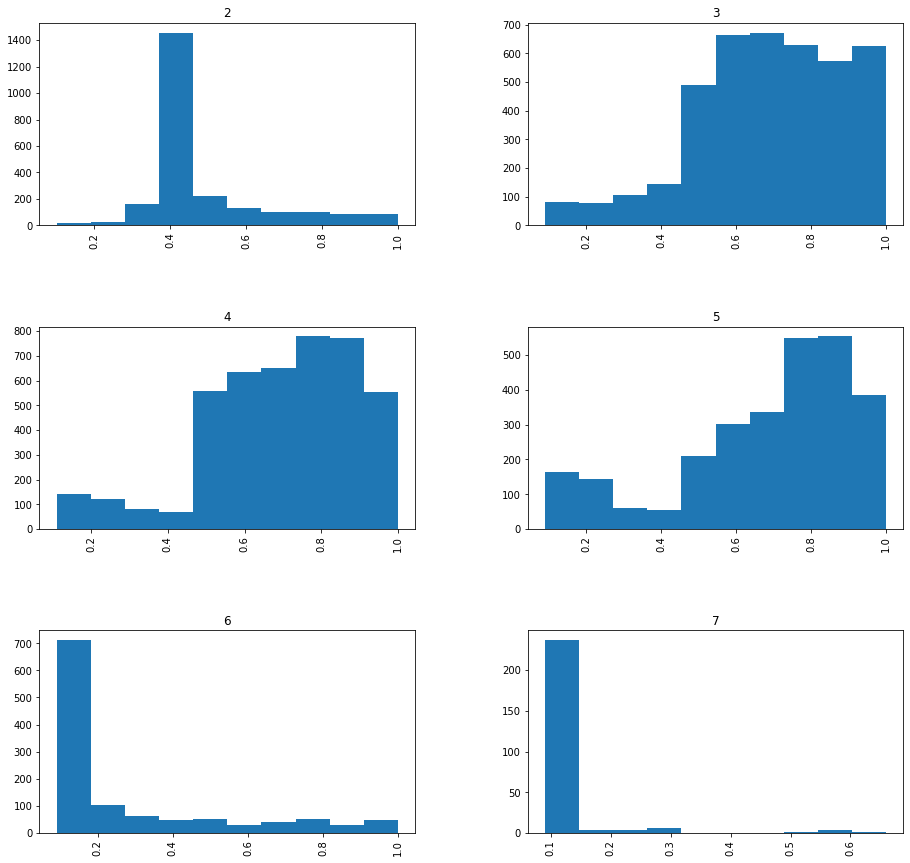

In [24]:
data_hr.hist(column='satisfaction_level', by='number_project',figsize=(15,15))
plt.show()

гипотеза сотрудники покидают компанию изза низкой зарплаты?

In [25]:
low_s = data_hr[data_hr['salary']=="low"].left
high_s = data_hr[data_hr['salary']=="high"].left

In [26]:
descriptives, results = rp.ttest(low_s, high_s)
print(descriptives)
print('_______________________________________')
print(results)

   Variable       N      Mean        SD        SE  95% Conf.  Interval
0      left  7316.0  0.296884  0.456916  0.005342   0.286412  0.307355
1      left  1237.0  0.066289  0.248888  0.007077   0.052406  0.080173
2  combined  8553.0  0.263533  0.440575  0.004764   0.254195  0.272872
_______________________________________
            Independent t-test    results
0  Difference (left - left) =      0.2306
1        Degrees of freedom =   8551.0000
2                         t =     17.3202
3     Two side test p value =      0.0000
4    Difference < 0 p value =      1.0000
5    Difference > 0 p value =      0.0000
6                 Cohen's d =      0.5325
7                 Hedge's g =      0.5324
8             Glass's delta =      0.5047
9                         r =      0.1841


Difference < 0 p value = 1, разница между двумя переменными отсутствует

гипотеза сотрудники покидают компанию изза низкого урвня удовлетворенности (низкий уровень удовлетворенности в 2,6,7 проекте)

In [27]:
data_hr.groupby(data_hr['number_project']).median()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
number_project,,,,,,,
2,0.43,0.53,149,3,0,1,0
3,0.70,0.71,196,3,0,0,0
4,0.73,0.75,208,3,0,0,0
5,0.74,0.79,222,3,0,0,0
6,0.11,0.83,255,4,0,1,0
7,0.10,0.88,281,4,0,1,0


In [28]:
data_hr.groupby(data_hr['number_project']).mean()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
number_project,,,,,,,
2,0.478769,0.568505,160.342546,3.180486,0.092965,0.656198,0.015494
3,0.687670,0.716572,197.507522,3.286560,0.175092,0.017756,0.023428
4,0.695132,0.740009,205.122108,3.454983,0.156472,0.093700,0.026804
5,0.678888,0.762010,212.061572,3.800072,0.150670,0.221659,0.018109
6,0.273458,0.786550,238.694208,4.192504,0.114140,0.557922,0.017036
7,0.118711,0.859609,276.078125,4.113281,0.015625,1.000000,0.000000


In [29]:
data_hr['satisfaction_level'].mean()

0.6128335222348166

In [30]:
data_hr['satisfaction_level'].median()

0.64

In [31]:
data_hr.groupby(data_hr['number_project'])[['sales']].count()

,sales
number_project,
2,2388
3,4055
4,4365
5,2761
6,1174
7,256


In [32]:
low_s_level = data_hr[data_hr['satisfaction_level']<0.64].left
high_s_level  = data_hr[data_hr['satisfaction_level']>=0.64].left

In [33]:
descriptives, results = rp.ttest(low_s_level , high_s_level)
print(descriptives)
print('_______________________________________')
print(results)

   Variable        N      Mean        SD        SE  95% Conf.  Interval
0      left   7334.0  0.356149  0.478893  0.005592   0.345187  0.367111
1      left   7665.0  0.125114  0.330870  0.003779   0.117706  0.132522
2  combined  14999.0  0.238083  0.425924  0.003478   0.231266  0.244899
_______________________________________
            Independent t-test     results
0  Difference (left - left) =       0.2310
1        Degrees of freedom =   14997.0000
2                         t =      34.4993
3     Two side test p value =       0.0000
4    Difference < 0 p value =       1.0000
5    Difference > 0 p value =       0.0000
6                 Cohen's d =       0.5635
7                 Hedge's g =       0.5635
8             Glass's delta =       0.4824
9                         r =       0.2712


In [34]:
stats.ttest_ind(low_s_level, high_s_level )

Ttest_indResult(statistic=34.49933528721708, pvalue=4.722826429453508e-251)

Значит, люди с показателем satisfaction_level меньше среднего увольняются чаще, чем остальные 